# Improve Fashion MNIST using Convolutions

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### First without convolutions, just like before

In [2]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels) ,(test_images, test_labels) = mnist.load_data()
training_images = training_images/255.
test_images = test_images/255.
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.summary()
test_loss = model.evaluate(test_images, test_labels)

W0623 18:17:22.518171 140328323352384 deprecation.py:506] From /home/elder/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4989 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3779 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3369 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3121 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2941 - acc: 0.8911
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params:

#### Accuracy is 89% on train data and 87% on test data. Let's add convolutions to make it better

## Adding `Conv2D` and `MaxPooling2D` layers
Added `EarlyStopping` callback

In [3]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels) ,(test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1)
model.fit(training_images, training_labels, epochs=100, callbacks=[early_stop])
model.summary()
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/100
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4421 - acc: 0.8391
Epoch 2/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2996 - acc: 0.8901
Epoch 3/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2510 - acc: 0.9072
Epoch 4/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2195 - acc: 0.9189
Epoch 5/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1919 - acc: 0.9285
Epoch 6/100
60000/60000 [==============================] - 5s 92us/sample - loss: 0.1701 - acc: 0.9354
Epoch 7/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1495 - acc: 0.9436
Epoch 8/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1304 - acc: 0.9508
Epoch 9/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1142 - acc: 0.9569
Epoch 10/100
60000/60000 [==============================] - 6s 92us/samp

#### Accuracy goes up to 93% by Epoch 5 due to the convolutions! The number of parameters and training time doubled though!

#### Adding the `EarlyStopping` callback allows it to be trained up to 99% accuracy in 28 Epochs

## Visualizing the Convolutions and Pooling layers

In [4]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [5]:
def DisplayLayerForThreeImages(FIRST_IMAGE = 2,
                               SECOND_IMAGE = 3,
                               THIRD_IMAGE = 6,
                               CONVOLUTION_NUMBER = 1):
    
    f, axarr = plt.subplots(3,5, figsize=(8,8))
    plt.suptitle('Convolution #%d' % CONVOLUTION_NUMBER)
    axarr[0,0].set_title('Input image')
    axarr[0,1].set_title('Conv 2D')
    axarr[0,2].set_title('Pooling')
    axarr[0,3].set_title('Conv 2D')
    axarr[0,4].set_title('Pooling')
    axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(28,28), cmap='inferno')
    axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(28,28), cmap='inferno')
    axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28,28), cmap='inferno')

    layer_outputs = [layer.output for layer in model.layers]
    ## Create a single model using the single layer
    activation_model= tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
    for x in range(0,4):
        f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
        axarr[0,x+1].imshow(f1[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
        axarr[0,x+1].grid(False)
        
        f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
        axarr[1,x+1].imshow(f2[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
        axarr[1,x+1].grid(False)
        
        f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
        axarr[2,x+1].imshow(f3[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
        axarr[2,x+1].grid(False)

## Let's look at pants

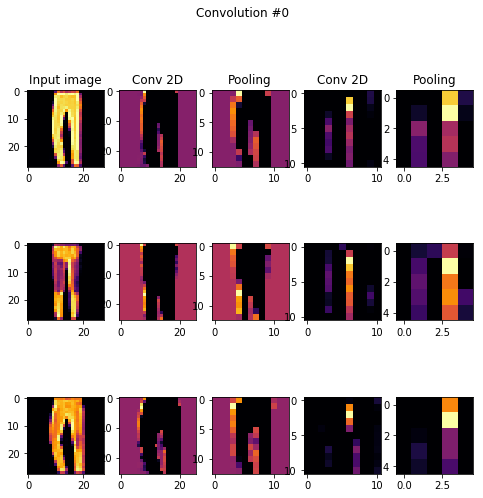

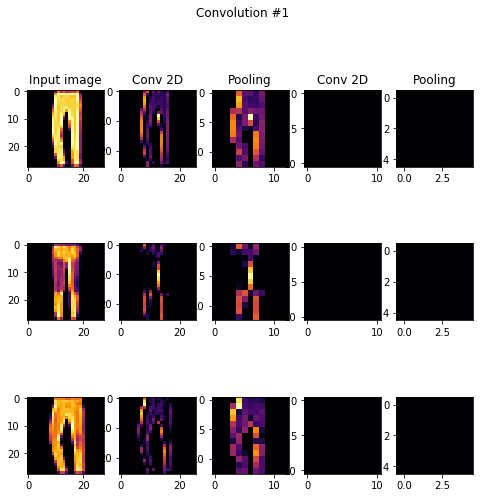

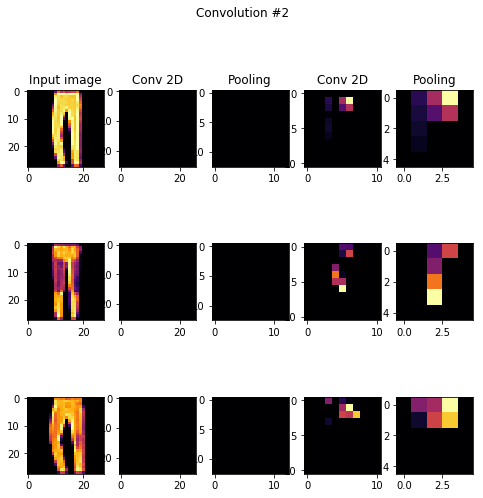

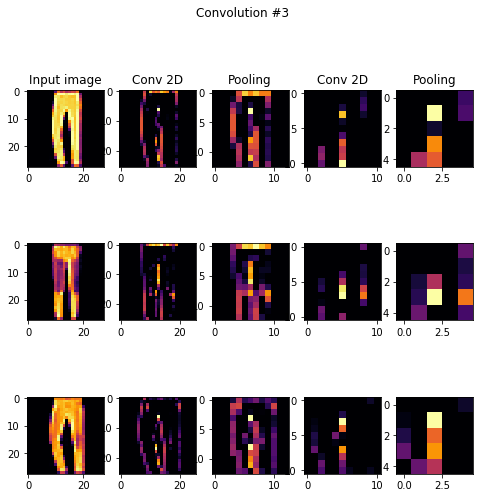

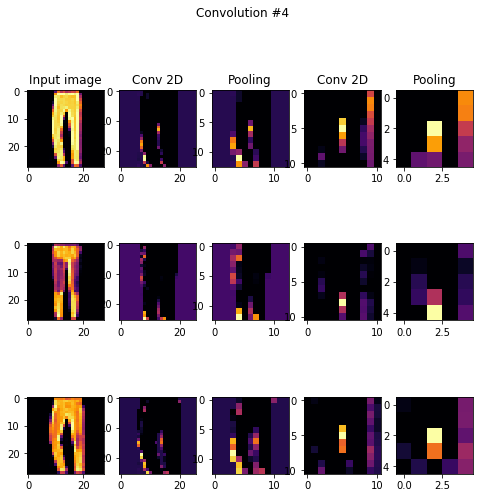

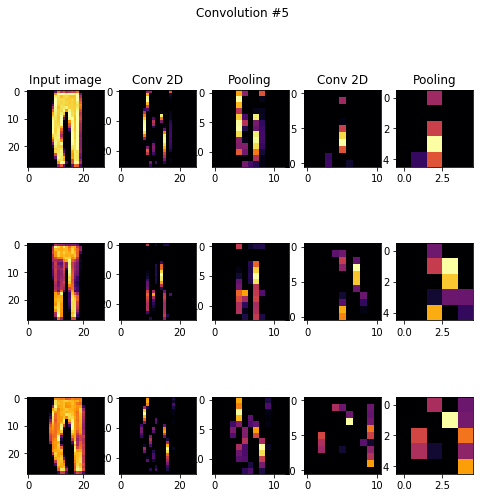

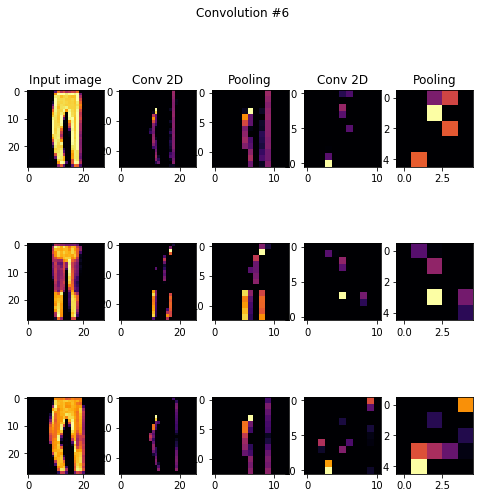

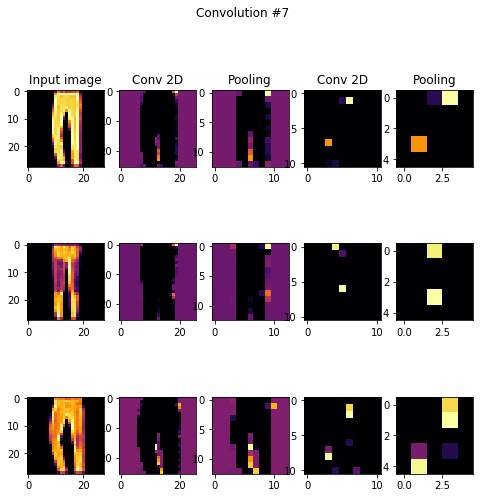

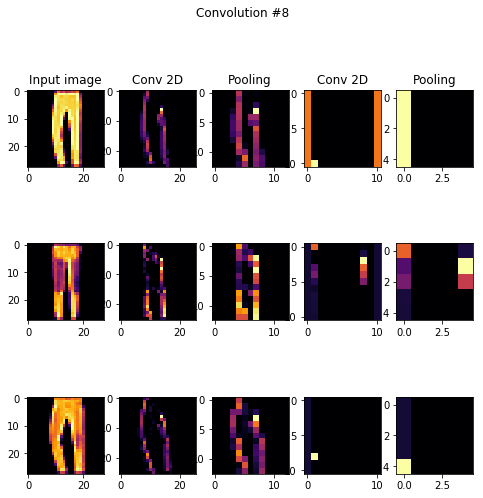

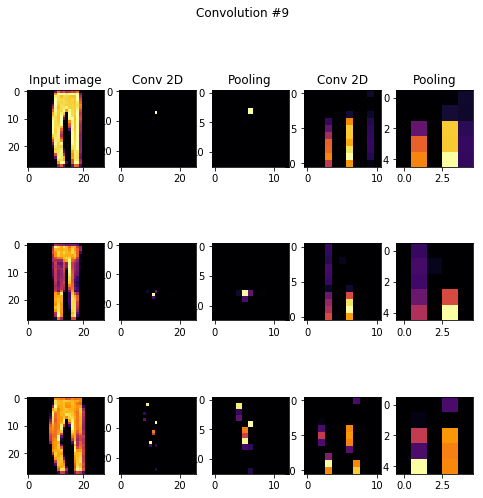

In [6]:
# The first 10 convolutions
for conv in range(0,10):
    DisplayLayerForThreeImages(2,3,5,conv)

## Now shoes!

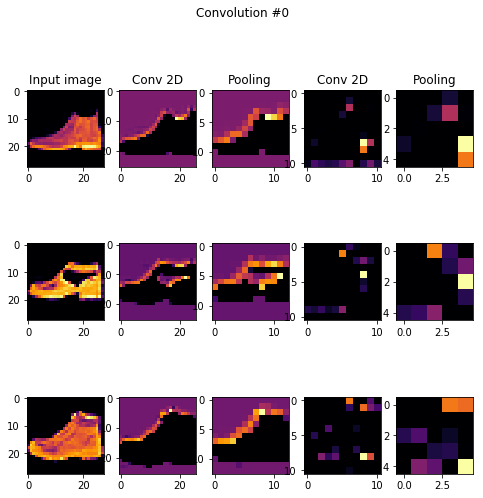

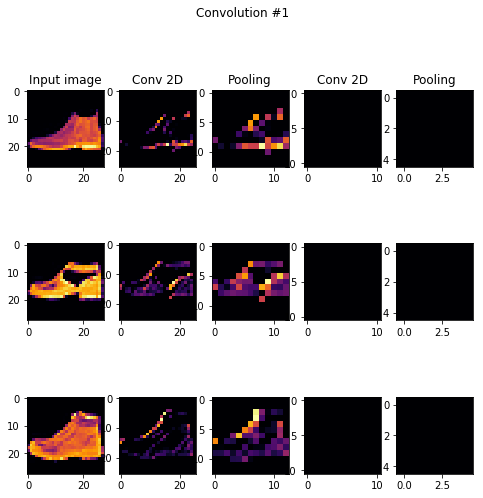

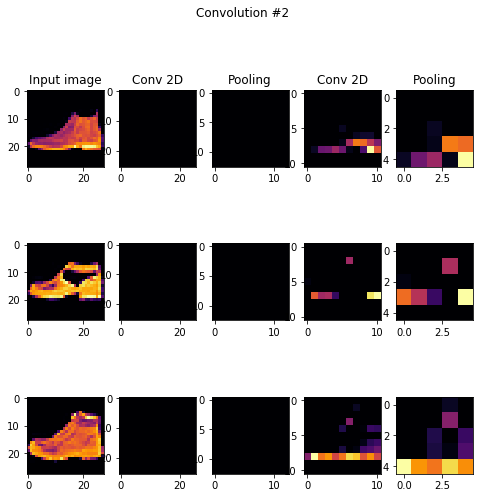

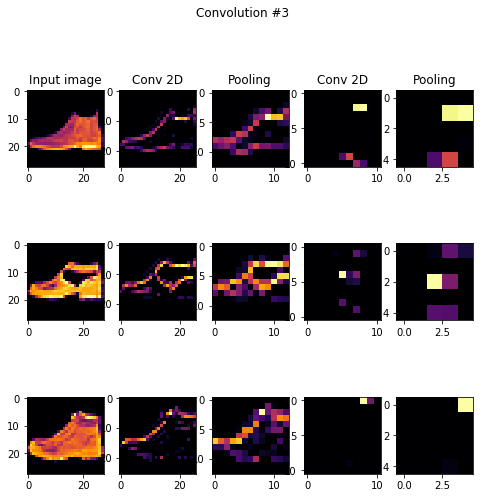

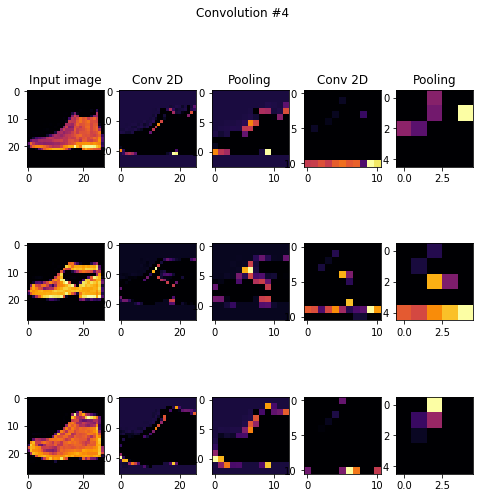

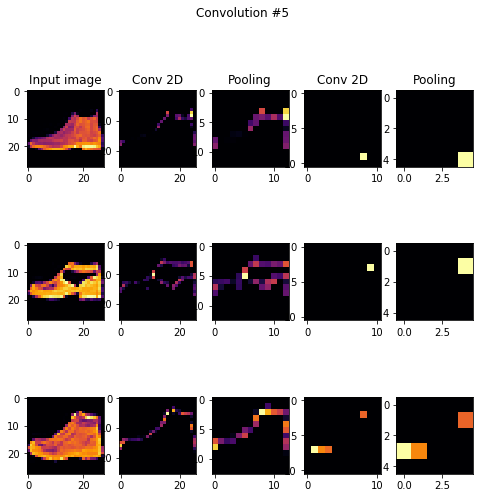

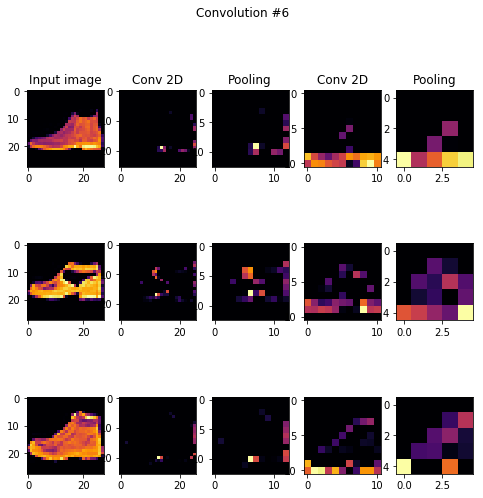

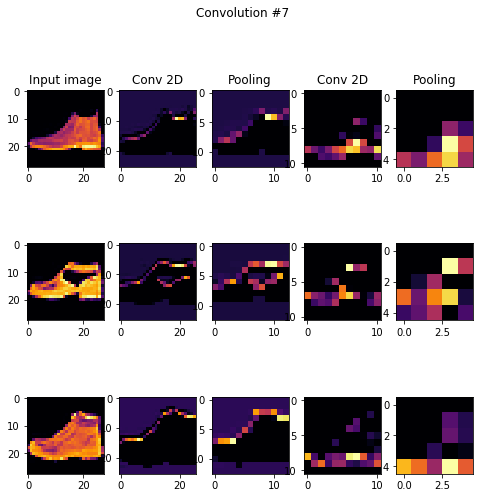

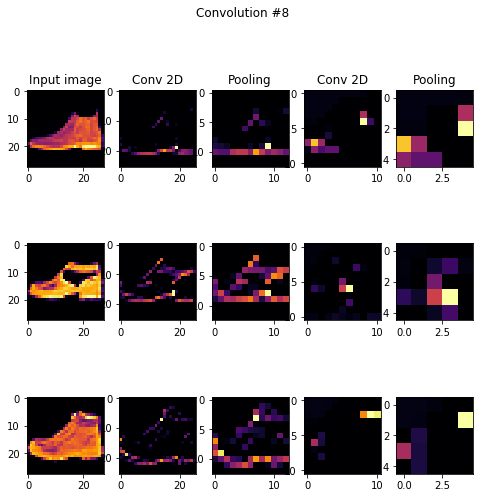

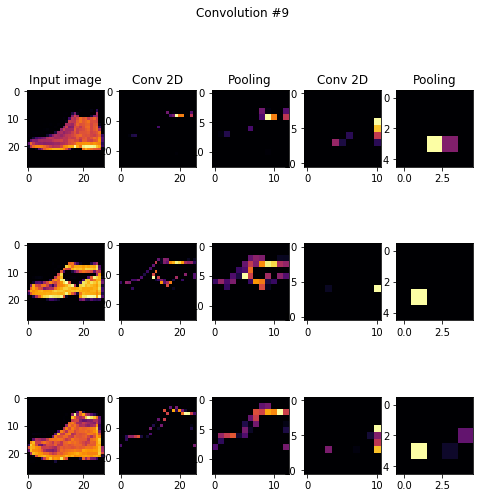

In [7]:
# The first 10 convolutions
for conv in range(0,10):
    DisplayLayerForThreeImages(0,23,28,conv)

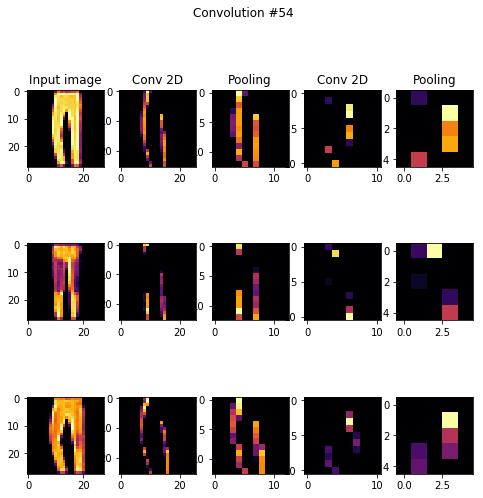

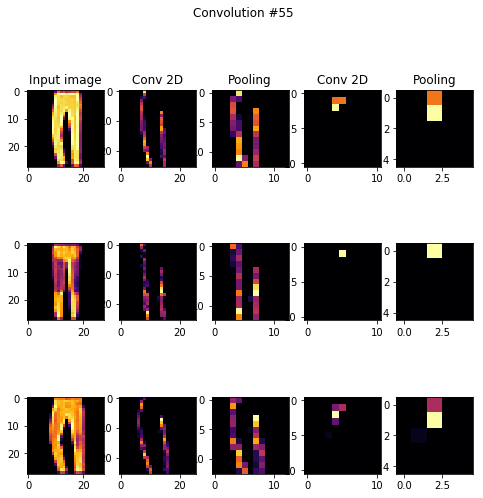

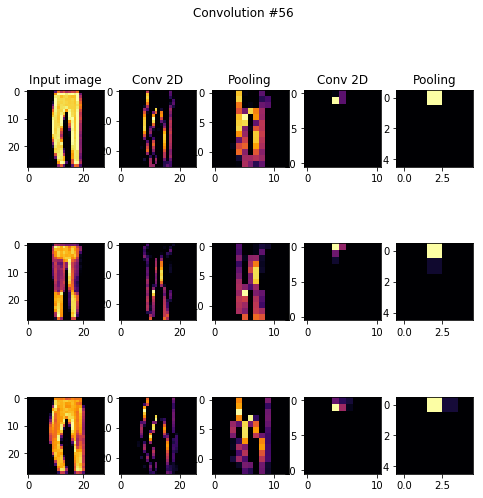

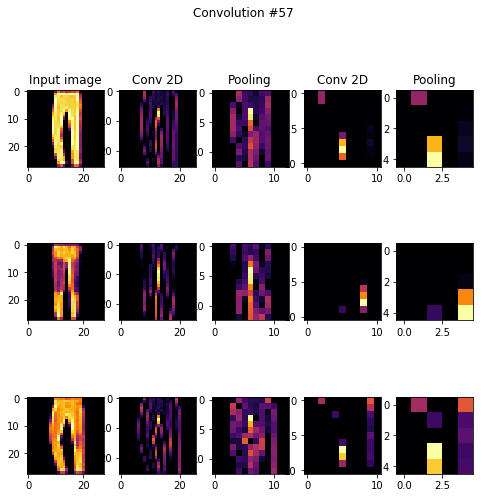

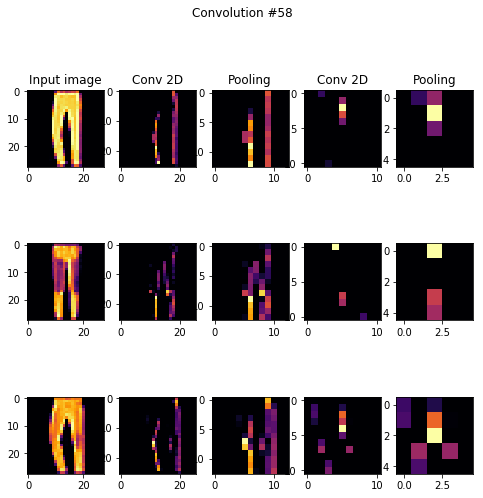

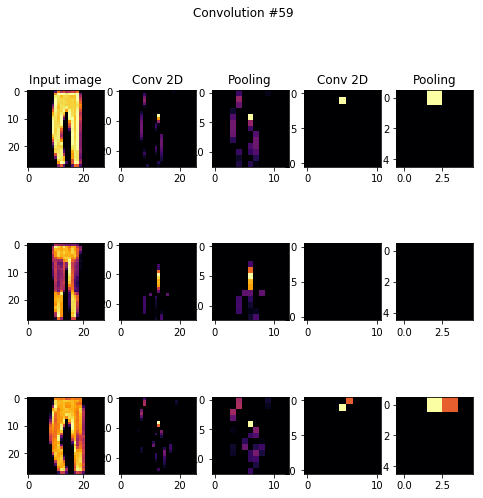

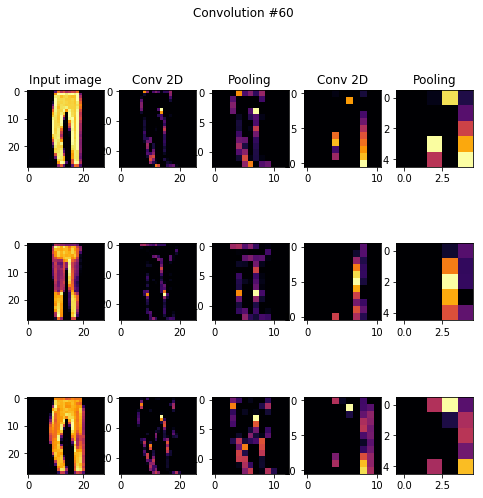

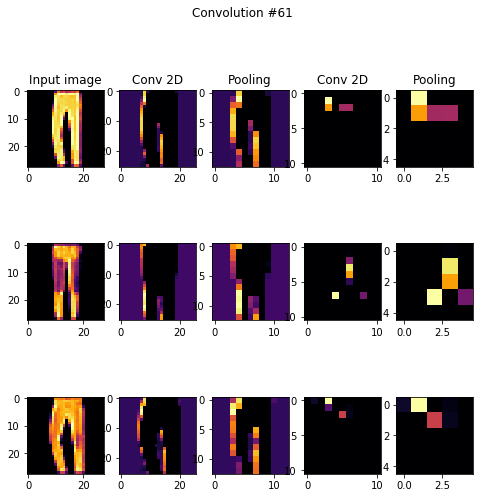

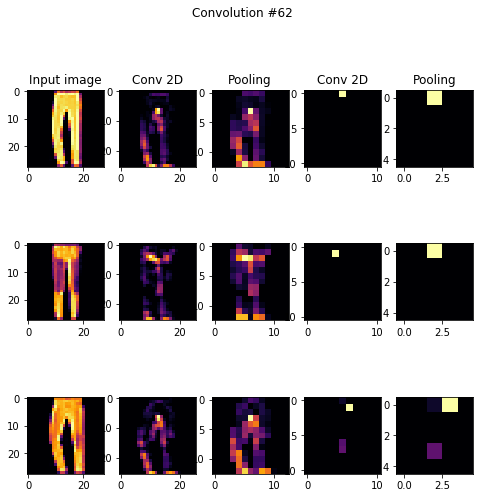

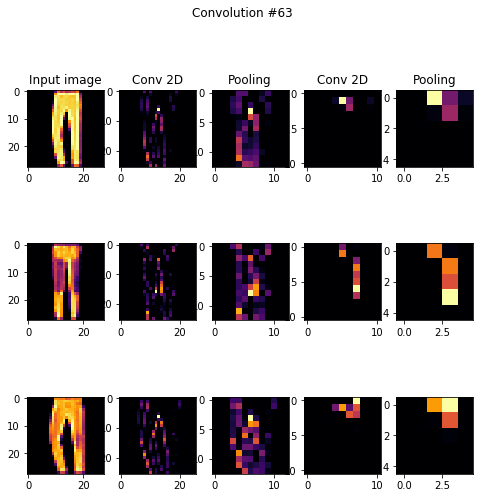

In [8]:
# The last 10 convolutions
for conv in range(54,64):
    DisplayLayerForThreeImages(2,3,5,conv)